# <b>Import Packages<b>

In [336]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,LassoLarsIC
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

In [312]:
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Dream with python\ML Project\Car Purchasing Model\Car_Purchasing_Data.csv")

In [313]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [314]:
df.columns

Index(['Customer Name', 'Customer e-mail', 'Country', 'Gender', 'Age',
       'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [315]:
df.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [316]:
df.dtypes

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                      int64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object

# <b>EDA<b>

<Axes: xlabel='Age', ylabel='Annual Salary'>

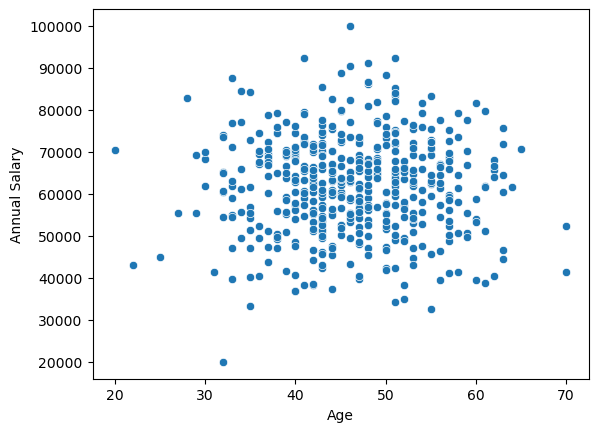

In [317]:
sns.scatterplot(data=df,x='Age',y='Annual Salary')

In [318]:
df[['Age','Annual Salary']].corr()

,Age,Annual Salary
Age,1.000000,0.000361
Annual Salary,0.000361,1.000000


<Axes: xlabel='Age', ylabel='Car Purchase Amount'>

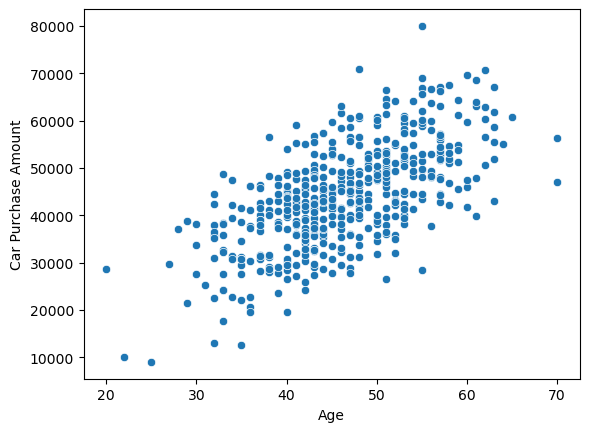

In [319]:
sns.scatterplot(data=df,x='Age',y='Car Purchase Amount')

In [320]:
df[['Age','Car Purchase Amount']].corr()

,Age,Car Purchase Amount
Age,1.000000,0.633273
Car Purchase Amount,0.633273,1.000000


<Axes: xlabel='Age', ylabel='Gender'>

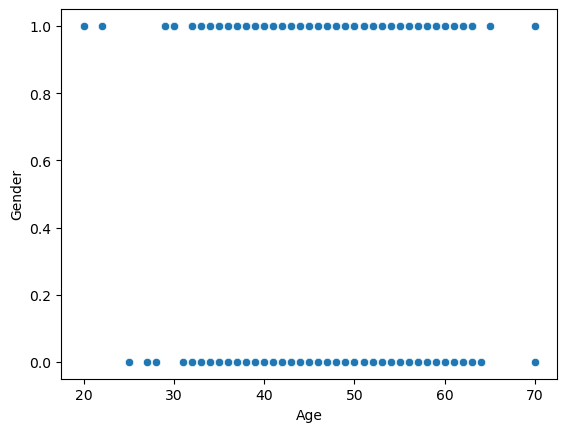

In [321]:
sns.scatterplot(data=df,x='Age',y='Gender')

<Axes: xlabel='Country', ylabel='count'>

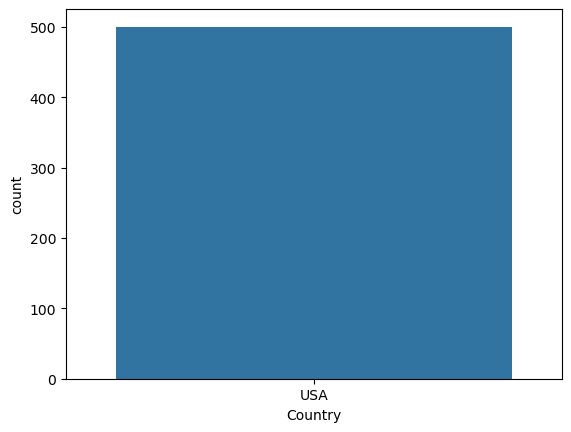

In [322]:
sns.countplot(data=df,x='Country')

In [323]:
df[['Age','Gender']].corr()

,Age,Gender
Age,1.000000,-0.066488
Gender,-0.066488,1.000000


In [324]:
df.drop(columns=['Customer Name', 'Customer e-mail', 'Country'],inplace=True)

# <b>Model Refinement and Evaluation<b>

<b><b>Feature Selection

In [325]:
X = df.drop(columns='Car Purchase Amount',axis=1)
y= df['Car Purchase Amount']

<b><b>Split dataset

In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [327]:
print("x_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("x_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

x_train shape =  (350, 5)
y_train shape =  (350,)
x_test shape =  (150, 5)
y_test shape =  (150,)


<b><b>Scaling

In [328]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<b><b>Fit the linearRegression(NNLS),
* Sometimes Non Negative Least Square better perform when predicted value are non negative quantities(here `Car Purchase Amount`)

In [329]:
model = LinearRegression(positive=True)
model.fit(X_train_scaled, y_train)

LinearRegression(positive=True)

In [330]:
y_predict = model.predict(X_test_scaled)
y_predict[0:5]

array([46003.22830217, 45207.76050493, 62986.57091952, 31610.31656668,
       60028.12436917])

In [331]:
predict = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict,'Difference':y_test-y_predict})
predict.head(10)

,Actual Value,Predicted Value,Difference
361,46082.80993,46003.228302,79.581628
73,45058.89690,45207.760505,-148.863605
374,63079.84329,62986.570920,93.272370
155,31837.22537,31610.316567,226.908803
104,60461.24268,60028.124369,433.118311
394,63140.05082,63053.548533,86.502287
377,52477.83479,52227.903214,249.931576
124,54755.42038,54525.016104,230.404276
68,52707.96816,52399.239608,308.728552
450,47869.82593,48245.500913,-375.674983


# <b>Accuracy Metrics<b>

In [332]:
R_Square = r2_score(y_test,y_predict)
AME = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
MAPE = '{:.2f}%'.format(mean_absolute_percentage_error(y_test,y_predict))


series= pd.Series({'R-Square':R_Square,'AME':AME,'RMSE':RMSE,'MAPE':MAPE})
metric = pd.DataFrame(series,columns=['Value'])
metric.index.name = 'Accuracy Metrics'
metric.T


Accuracy Metrics,R-Square,AME,RMSE,MAPE
Value,0.999398,217.742718,253.533013,0.01%


# <b>Plot Actual vs Predicted Value<b>

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test,y=y_predict,scatter_kws={'color': 'green'},line_kws=dict(color="r"))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

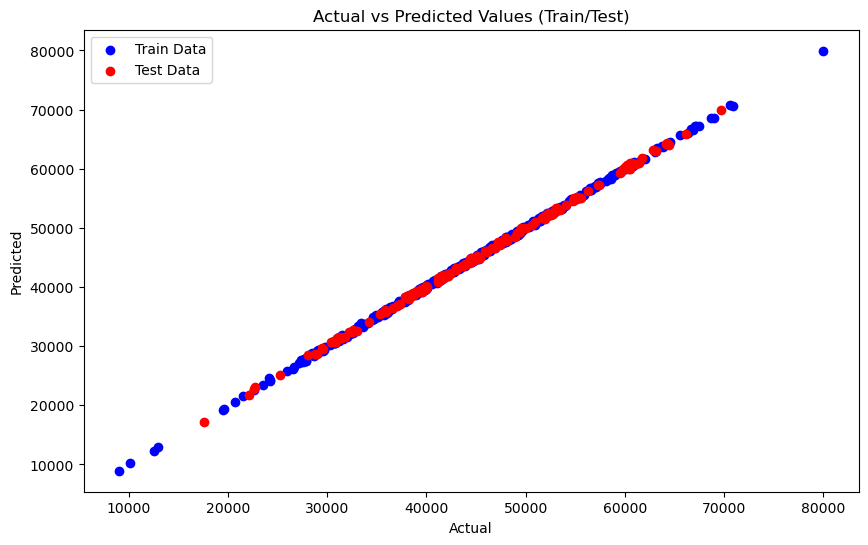

MSE of Train: 55498.83180007472
MSE of Test: 64278.98864257659
R_Square of Train set: 0.9995345377746694
R_Square of Test set: 0.9993975955578742


In [333]:
y_train_pred = model.predict(X_train_scaled)
# Calculate the mean squared error & R_square for both train and test predictions
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_predict)
R_Square_train = r2_score(y_train, y_train_pred)
R_Square_test = r2_score(y_test, y_predict)

# Plotting train & test data
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train Data')
plt.scatter(y_test, y_predict, color='red', label='Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Train/Test)')
plt.legend()
plt.show()

print(f"MSE of Train: {mse_train}")
print(f"MSE of Test: {mse_test}")
print(f'R_Square of Train set: {R_Square_train}')
print(f'R_Square of Test set: {R_Square_test}')


<b><b>Observing those value notice that train set little bit better perform than test set. So,I assume that here little overfitting problem.

In [339]:
ridge = Ridge(alpha=0.001)  # alpha is the regularization parameter
ridge.fit(X_train_scaled, y_train)

# Making predictions
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Train MSE: 55498.832744923246
Test MSE: 64279.95566661461


In [338]:
alpha_range = np.logspace(-3, 0, 10)  # Range of alpha values to explore
scoring = 'neg_mean_squared_error'

# Create a GridSearchCV object using Lasso and chosen scoring metric
grid_search = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha_range}, 
                           scoring=scoring, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best model with the lowest information criterion score
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Print the best alpha value chosen by GridSearchCV
print(f"Best Alpha ({scoring[:-15]}): {grid_search.best_params_['alpha']}")


Mean Squared Error: 64278.93
Best Alpha (neg_mea): 0.001
